In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

In [7]:
def lift(arr):
    arr = np.array(arr)
    return arr.reshape((arr.shape[0], 1))


grades = np.array([[11,8,5,6,9,12,6,6,12,9,3,14,11,14,6,6,8,12,3,9,12],
                   [1,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1,1,0,0,1]])
type(grades)

numpy.ndarray

In [8]:
X = grades[0,:]
Y = grades[1,:]

s = list(map(lambda x, y: 30* len(X[(X == x) & (Y == y)]), X, Y))

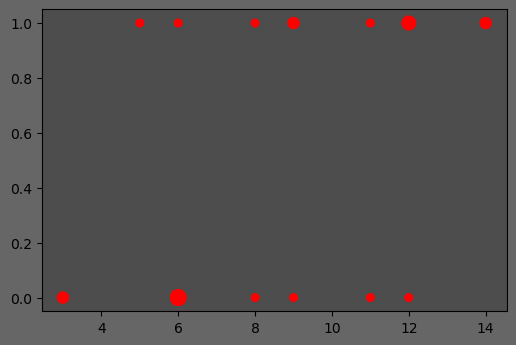

In [9]:
plt.figure(facecolor='0.4',dpi = 100)
plt.axes().set_facecolor('0.3')

plt.scatter(X,Y ,c='r', s=s)
plt.show()

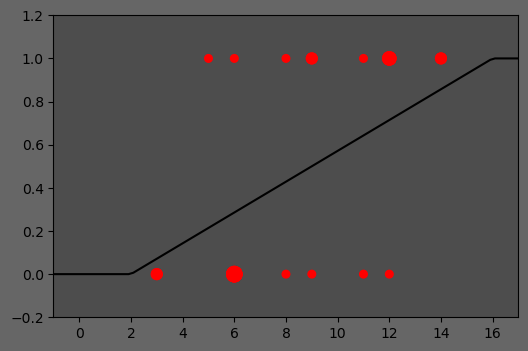

In [10]:
def prob(grade):
    if grade > 16:
        return 1
    if grade < 2:
        return 0
    return 1/14 * grade - 1/7
g = np.linspace(-1,17,100)


plt.figure(facecolor='0.4',dpi = 100)
plt.axes().set_facecolor('0.3')
plt.axis([-1,17,-0.2,1.2])
plt.plot(g, list(map(prob,g)),c='black')
plt.scatter(X,Y ,c='r', s=s)
plt.show()

In [11]:
class Number:
    def __init__(self, x):
        self.x = x
        
    
    
    def __add__(self,other):
        return Number(self.x + other.x)
    
    def __repr__(self):
        return '0 dimensional array with x = {} '.format(self.x)
    
    def __call__(self):
        print('called successfully {}'.format(self))
        
        
    
        
        
n1 = Number(3)
n2 = Number(4)

n3 = n1.__add__(n2)